In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df = pd.read_csv('survey.csv')

In [25]:
# List of columns to check unique values
columns_to_check = ['treatment', 'Gender', 'family_history', 'no_employees', 
                    'remote_work', 'work_interfere', 'tech_company', 'benefits', 
                    'anonymity', 'leave', 'mental_health_interview']

def simplify_gender(gender):
    if gender.lower() in ['male', 'm', 'cis male', 'cis-male/trans-male', 'maile', 'male (cis)', 'msle', 'mal', 'male ', 'man', 'make', 'malr']:
        return 'Male'
    elif gender.lower() in ['female', 'f', 'woman', 'femake', 'female (cis)', 'cis female', 'female ']:
        return 'Female'
    else:
        return 'Other'

# Apply the function to create the new column
df['Gender'] = df['Gender'].astype(str).apply(simplify_gender)

def group(val):
    return val.value_counts(normalize=True).unstack().fillna(0)

# Iterate through each column and print unique values
for col in columns_to_check:
    unique_values = df[col].unique()
    if (len(unique_values) > 20):
        # Sample 20 of them if there are too many unique values
        print(f"Unique values for {col} (sample of 20): {pd.Series(unique_values).sample(20, replace=False).tolist()}")
    else:
        # Otherwise print all unique values from the column
        print(f"Unique values for {col}: {unique_values.tolist()}")

Unique values for treatment: ['Yes', 'No']
Unique values for Gender: ['Female', 'Male', 'Other']
Unique values for family_history: ['No', 'Yes']
Unique values for no_employees: ['6-25', 'More than 1000', '26-100', '100-500', '1-5', '500-1000']
Unique values for remote_work: ['No', 'Yes']
Unique values for work_interfere: ['Often', 'Rarely', 'Never', 'Sometimes', nan]
Unique values for tech_company: ['Yes', 'No']
Unique values for benefits: ['Yes', "Don't know", 'No']
Unique values for anonymity: ['Yes', "Don't know", 'No']
Unique values for leave: ['Somewhat easy', "Don't know", 'Somewhat difficult', 'Very difficult', 'Very easy']
Unique values for mental_health_interview: ['No', 'Yes', 'Maybe']


In [ ]:
# 1. Treatment Rate
treatment_rate = (df['treatment'] == 'Yes').mean() * 100
print(f"Overall treatment rate: {treatment_rate:.2f}%")

Overall treatment rate: 50.60%


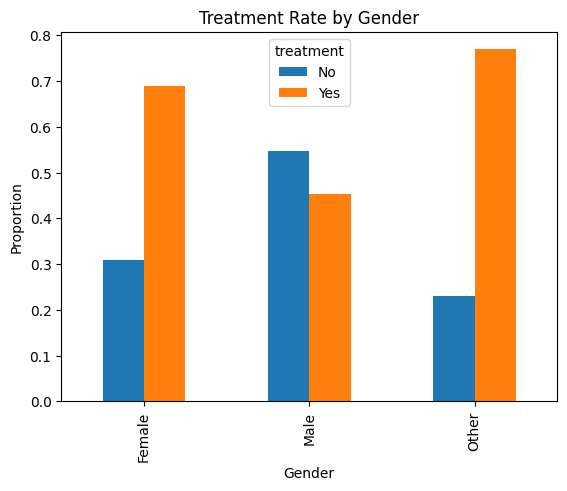

In [26]:
# 2. Gender & Treatment
gender_treatment = group(df.groupby('Gender')['treatment'])
gender_treatment.plot(kind='bar')
plt.title('Treatment Rate by Gender')
plt.ylabel('Proportion')
plt.show()

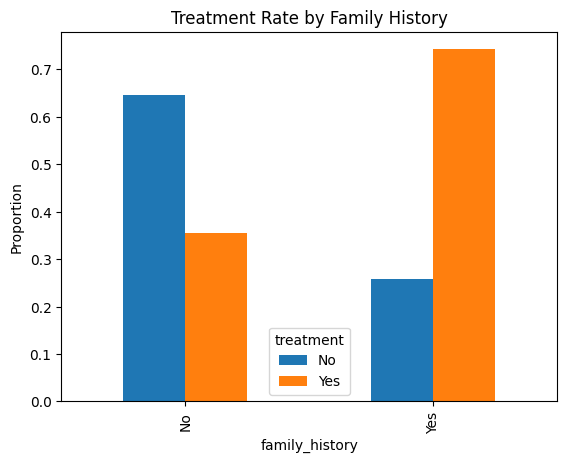

In [15]:
# 3. Family History Impact
family_treatment = group(df.groupby('family_history')['treatment'])
family_treatment.plot(kind='bar')
plt.title('Treatment Rate by Family History')
plt.ylabel('Proportion')
plt.show()

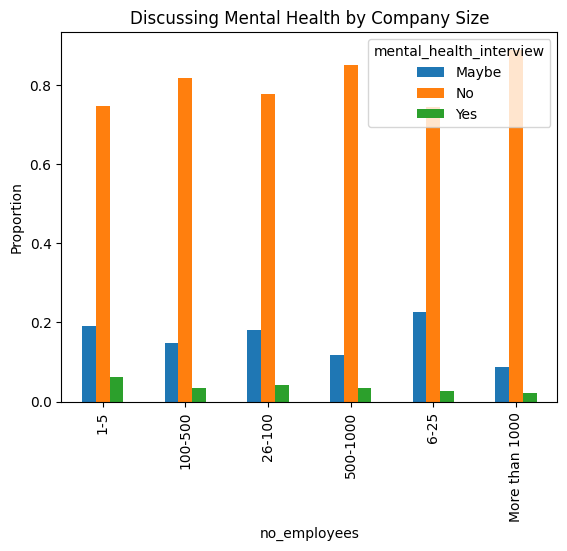

In [17]:
# 4. Company Size & Openness
company_discussion = group(df.groupby('no_employees')['mental_health_interview'])
company_discussion.plot(kind='bar')
plt.title('Discussing Mental Health by Company Size')
plt.ylabel('Proportion')
plt.show()

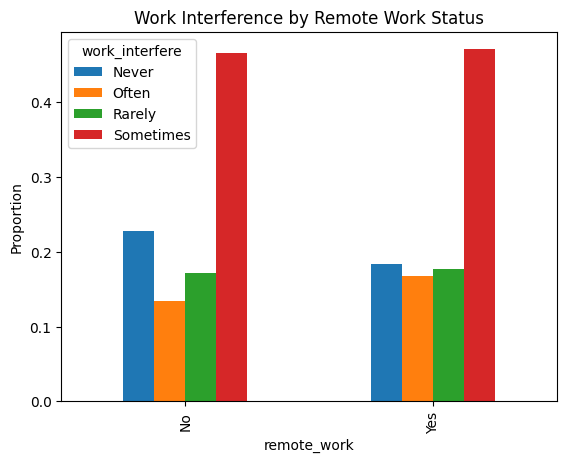

In [18]:
# 5. Remote Work & Interference
remote_interference = group(df.groupby('remote_work')['work_interfere'])
remote_interference.plot(kind='bar')
plt.title('Work Interference by Remote Work Status')
plt.ylabel('Proportion')
plt.show()


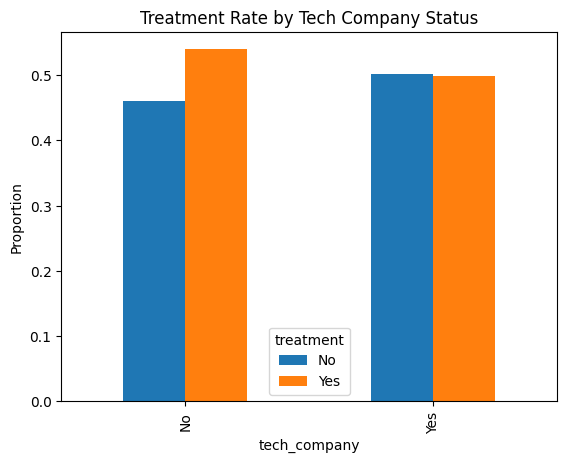

In [19]:
# 6. Tech vs Non-Tech
tech_treatment = group(df.groupby('tech_company')['treatment'])
tech_treatment.plot(kind='bar')
plt.title('Treatment Rate by Tech Company Status')
plt.ylabel('Proportion')
plt.show()

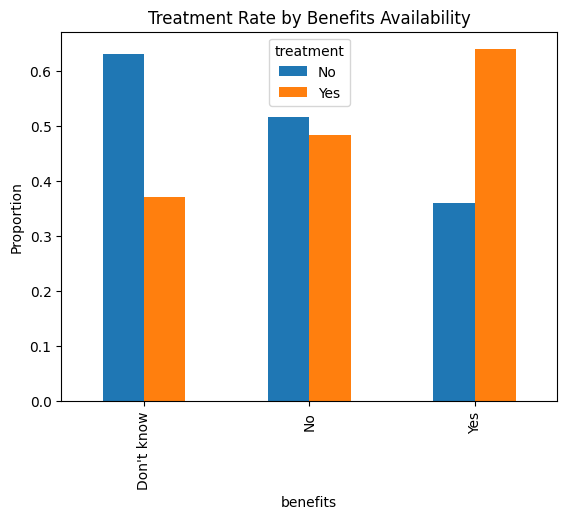

In [20]:
# 7. Benefits & Treatment
benefits_treatment = group(df.groupby('benefits')['treatment'])
benefits_treatment.plot(kind='bar')
plt.title('Treatment Rate by Benefits Availability')
plt.ylabel('Proportion')
plt.show()

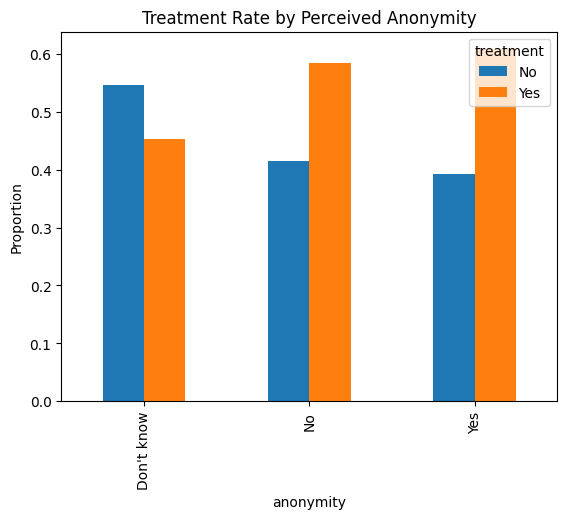

In [21]:
# 8. Anonymity & Help-Seeking
anonymity_treatment = group(df.groupby('anonymity')['treatment'])
anonymity_treatment.plot(kind='bar')
plt.title('Treatment Rate by Perceived Anonymity')
plt.ylabel('Proportion')
plt.show()

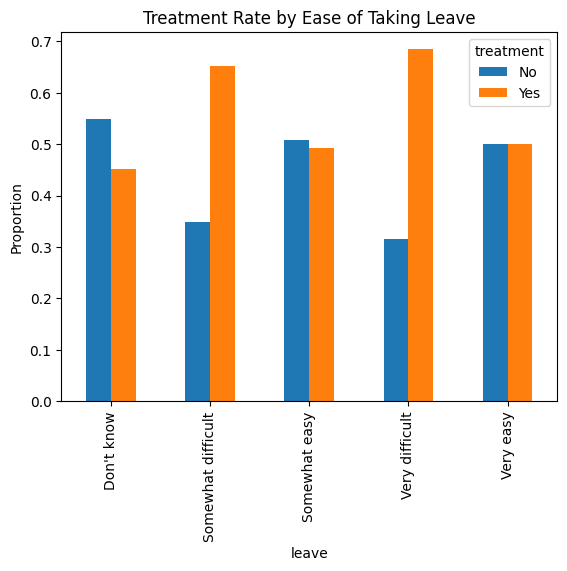

In [22]:
# 9. Leave Ease & Treatment
leave_treatment = group(df.groupby('leave')['treatment'])
leave_treatment.plot(kind='bar')
plt.title('Treatment Rate by Ease of Taking Leave')
plt.ylabel('Proportion')
plt.show()

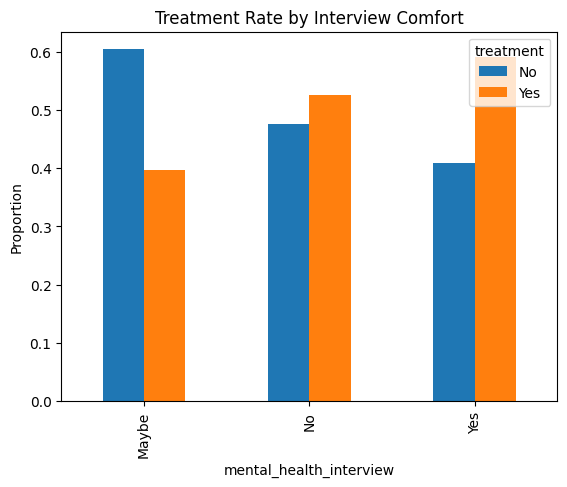

In [23]:
# 10. Interview Comfort & Treatment
interview_treatment = group(df.groupby('mental_health_interview')['treatment'])
interview_treatment.plot(kind='bar')
plt.title('Treatment Rate by Interview Comfort')
plt.ylabel('Proportion')
plt.show()